# SALES PREDICTION

 ### It is used for linear regression tasks and contains information about advertising spending across different media channels and the corresponding sales figures. Here’s a detailed breakdown of the dataset:
 ### TV: Amount spent on TV advertising (in thousands of dollars).
### Radio: Amount spent on Radio advertising (in thousands of dollars).
### Newspaper: Amount spent on Newspaper advertising (in thousands of dollars).
### Sales: Sales figures (in thousands of units) corresponding to the advertising spend.

In [2]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.shape

(200, 5)

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# DATA CLEANING

In [7]:
df.columns = df.columns.str.lower()

In [33]:
df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,4.237001,22.1
1,44.5,39.3,3.808882,10.4
2,17.2,45.9,4.238445,9.3
3,151.5,41.3,4.069027,18.5
4,180.8,10.8,4.067316,12.9


In [8]:
df.isnull().sum()

unnamed: 0    0
tv            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
df.drop('unnamed: 0', axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,tv,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# DATA PRE-PROCESSING

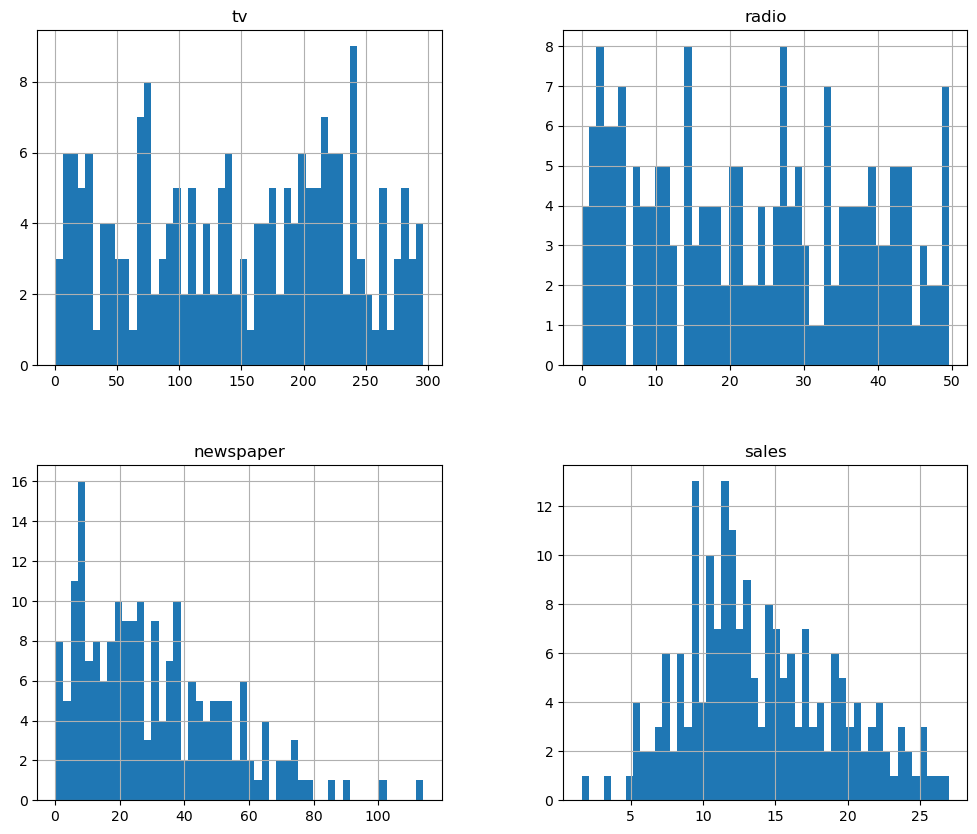

In [12]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

In [13]:
df['newspaper'] = np.log(df['newspaper'])

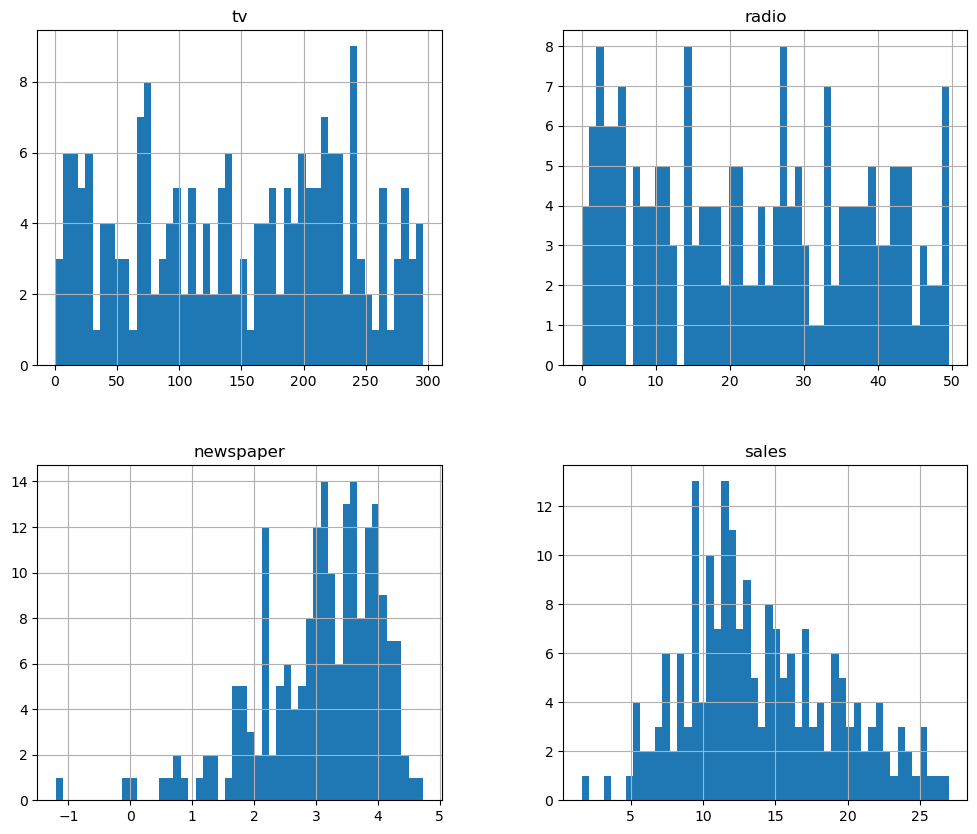

In [14]:
df.hist(figsize = (12,10), bins = 50)
plt.show()

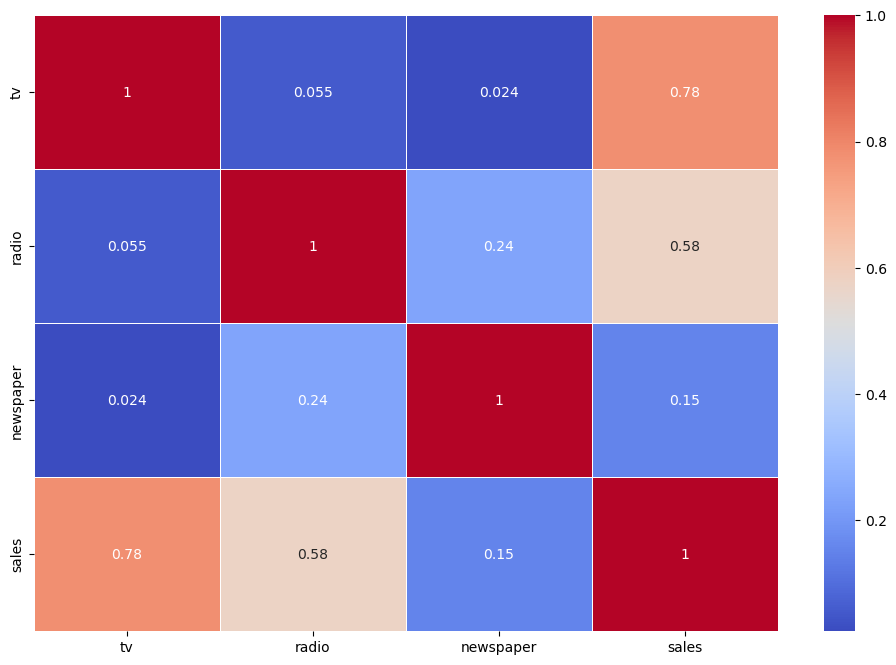

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# Model Training

In [20]:
# Split the data into training and testing sets
X = df.drop('sales', axis=1)
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

In [22]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.1674100136155805
R-squared: 0.8996498928891588


In [23]:
# Decision Tree Regresso
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)

In [24]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.175
R-squared: 0.9310914968293178


In [25]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)


In [26]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5884006749999989
R-squared: 0.9813582483775315


In [28]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)


In [29]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.531903410427986
R-squared: 0.983148198692426


In [30]:
# SVM
from sklearn.svm import SVR

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

In [31]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.6499539325508676
R-squared: 0.8843619024671148


# Prediction

In [41]:
import random

# Step 1: Take random 5 rows from the dataset with columns TV, Radio, Newspaper
random.seed(42)  # Setting a seed for reproducibility
sample_data = df[['tv', 'radio', 'newspaper']].sample(5)

In [42]:
sample_data

,tv,radio,newspaper
61,261.3,42.7,4.001864
109,255.4,26.9,1.704748
35,290.7,4.1,2.140066
91,28.6,1.5,3.496508
104,238.2,34.3,1.667707


In [37]:
# Step 2: Add the 'Total_Advertising_Spending' column
sample_data['Total_Advertising_Spending'] = sample_data['tv'] + sample_data['radio'] + sample_data['newspaper']

In [38]:
sample_data

,tv,radio,newspaper,Total_Advertising_Spending
109,255.4,26.9,1.704748,284.004748
144,96.2,14.8,3.660994,114.660994
178,276.7,2.3,3.165475,282.165475
169,284.3,10.6,1.856298,296.756298
101,296.4,36.3,4.614130,337.314130


In [43]:
# Step 3: Make predictions using the five models
linear_predictions = model_linear.predict(sample_data)
tree_predictions = model_tree.predict(sample_data)
forest_predictions = model_forest.predict(sample_data)
gb_predictions = model_gb.predict(sample_data)
svm_predictions = model_svm.predict(sample_data)

In [45]:
# Step 4: Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Decision Tree Prediction': tree_predictions,
    'Random Forest Prediction': forest_predictions,
    'Gradient Boosting Prediction': gb_predictions,
    'SVM Prediction': svm_predictions
})

In [46]:
# Print the table
predictions_table

,Original Value,Linear Regression Prediction,Decision Tree Prediction,Random Forest Prediction,Gradient Boosting Prediction,SVM Prediction
61,24.2,22.919172,24.2,24.416,24.496161,23.094898
109,19.8,19.450739,19.8,19.294,19.661237,19.694842
35,12.8,16.763275,12.8,12.544,12.706312,16.540013
91,7.3,4.659968,7.3,7.509,7.299932,4.920078
104,20.7,20.075611,20.7,20.560,20.738196,20.473823
